<a href="https://colab.research.google.com/github/karishma-upadhyay/IIITH_Projects_and_Apps/blob/main/Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


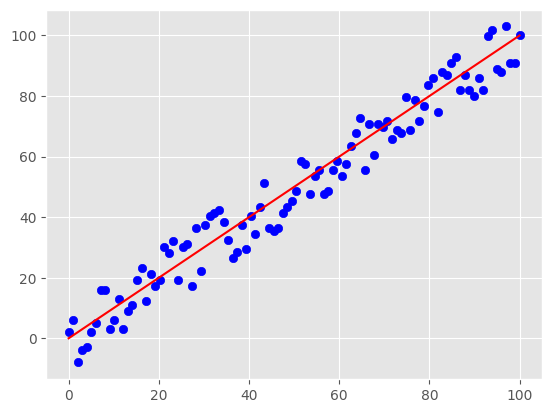

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

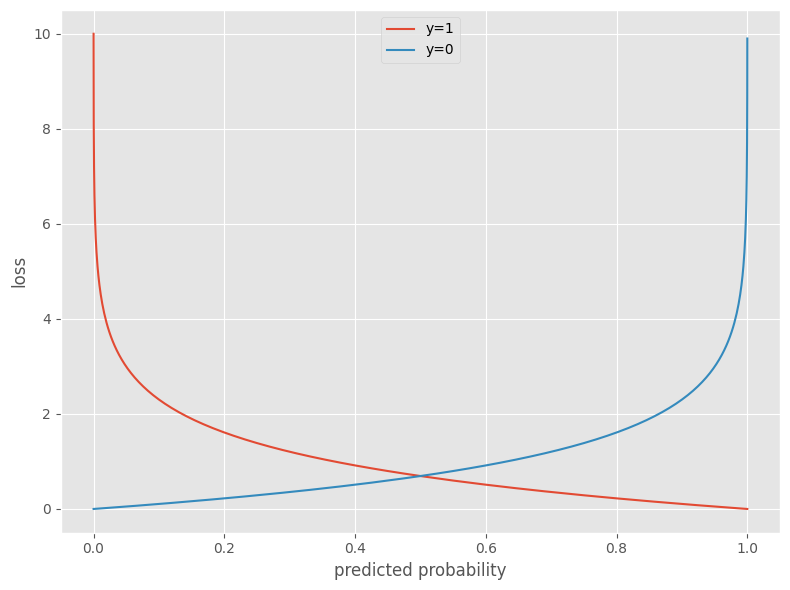

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

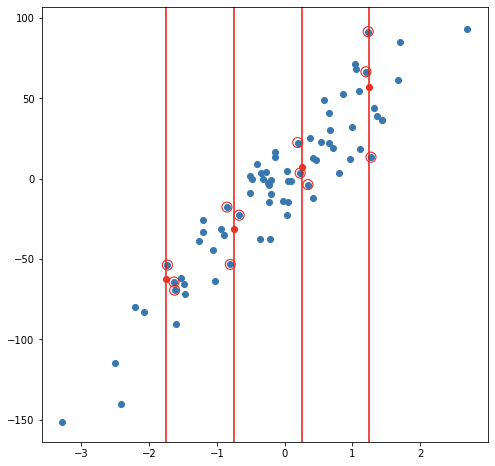

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

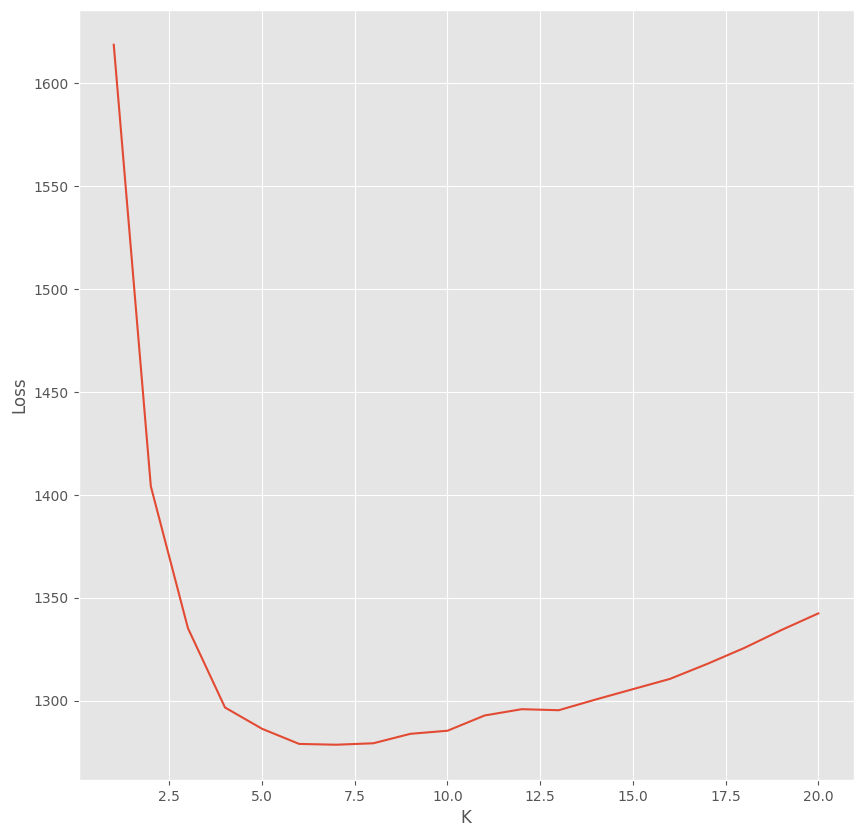

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))


1) Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

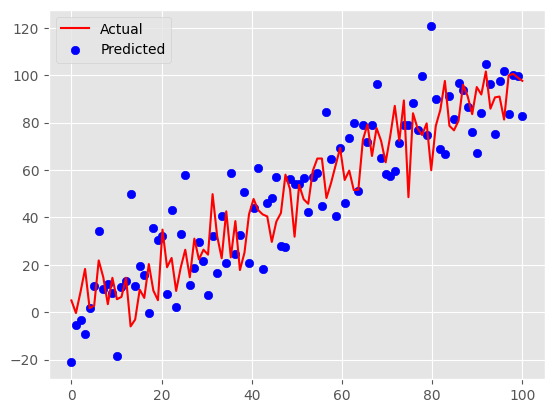

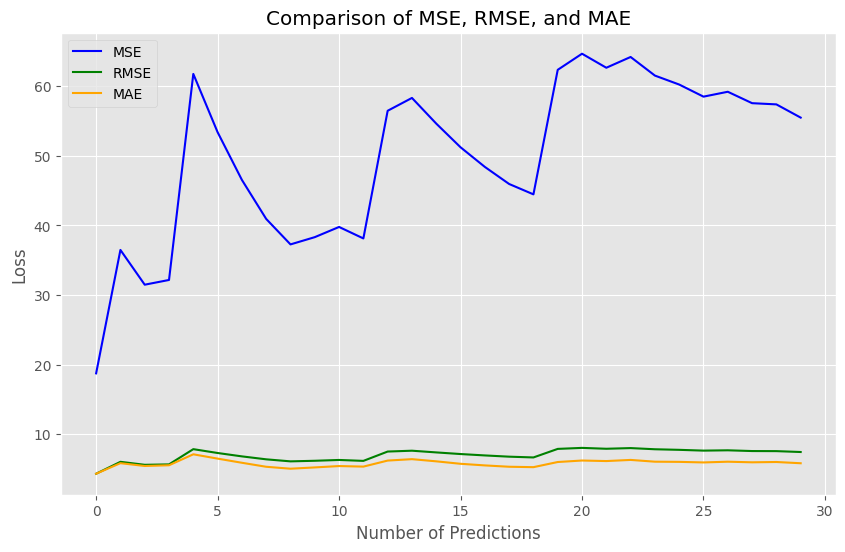

Final MSE: 55.48631384865894
Final RMSE: 7.448913601905914
Final MAE: 5.83455389882784


In [14]:
'''
  In regression tasks, different loss functions provide distinct ways to
  penalize errors, influencing model performance. Mean Squared Error (MSE)
  amplifies large errors due to squaring, making it more sensitive to outliers.
  This can cause the model to overcompensate for extreme values. Root Mean
  Squared Error (RMSE) is just a square root transformation of MSE, offering
  a more interpretable result since it's in the same unit as the target
  variable. Mean Absolute Error (MAE), on the other hand, treats all errors
  equally, making it more robust to outliers but can be less sensitive to
  small changes in predictions. When applied, MSE often leads to smoother
  models, while MAE provides a more stable outcome in the presence of noisy data.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate synthetic data for datatesting purpose
np.random.seed(42)
x = np.linspace(0, 100, 100)
y_actual = x + np.random.normal(0, 10, 100)  # Actual data with some noise
y_pred = x + np.random.normal(0, 15, 100)    # Predicted data with more noise

# Plot actual vs predicted
plt.plot(x, y_actual, label="Actual", color="red")
plt.scatter(x, y_pred, label="Predicted", color="blue")
plt.legend()
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y_actual, test_size=0.3, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate loss functions for each test prediction
mse_list = []
rmse_list = []
mae_list = []

for i in range(len(y_pred_test)):
    # Compute MSE, RMSE, and MAE for the first 'i+1' points
    mse = mean_squared_error(y_test[:i+1], y_pred_test[:i+1])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[:i+1], y_pred_test[:i+1])

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)

# Plotting the loss functions
plt.figure(figsize=(10, 6))
plt.plot(mse_list, label="MSE", color="blue")
plt.plot(rmse_list, label="RMSE", color="green")
plt.plot(mae_list, label="MAE", color="orange")
plt.title('Comparison of MSE, RMSE, and MAE')
plt.xlabel('Number of Predictions')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print final values for reference
print(f"Final MSE: {mse_list[-1]}")
print(f"Final RMSE: {rmse_list[-1]}")
print(f"Final MAE: {mae_list[-1]}")



2. Explore other loss functions and try to understand when and why they are used.

MSE: 55.48631384865894
RMSE: 7.448913601905914
MAE: 5.83455389882784
Huber Loss: 5.351492505713698
Log-Cosh Loss: 5.182460908199338


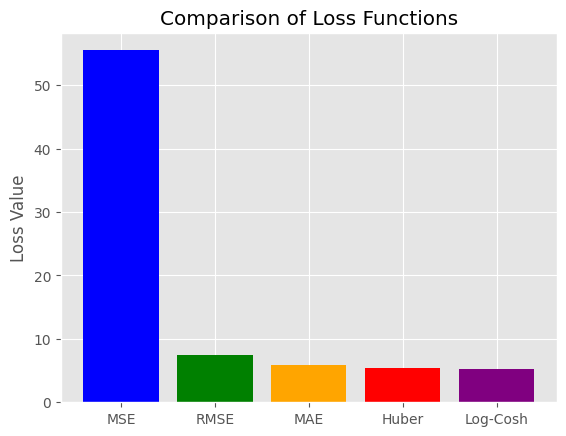

In [16]:
'''
There are several other loss functions beyond MSE, RMSE, and MAE that can be useful in regression tasks, each suited for different situations.
Below are a few other common loss functions along with explanations and code implementations:

1. Huber Loss:
    =>A combination of MSE and MAE that is less sensitive to outliers than MSE but more stable than MAE.
    =>It behaves like MSE when errors are small and like MAE when errors are large.
2. Log-Cosh Loss:
    =>A smooth approximation to MAE that is less sensitive to large differences and prevents gradient issues associated with absolute loss.
    =>This function is differentiable, which is useful for gradient-based optimization methods.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 100, 100)
y_actual = x + np.random.normal(0, 10, 100)  # Actual data with some noise
y_pred = x + np.random.normal(0, 15, 100)    # Predicted data with more noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y_actual, test_size=0.3, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

# Define additional loss functions

# 1. Huber Loss (combines MAE and MSE)
def huber_loss(delta, y_true, y_pred):
    error = y_true - y_pred
    loss = np.where(np.abs(error) <= delta,
                    0.5 * error ** 2,
                    delta * (np.abs(error) - 0.5 * delta))
    return np.mean(loss)

# 2. Log-Cosh Loss (smooth approximation of MAE)
def log_cosh_loss(y_true, y_pred):
    return np.mean(np.log(np.cosh(y_pred - y_true)))

# Calculate loss for each function
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
huber = huber_loss(delta=1.0, y_true=y_test, y_pred=y_pred_test)
log_cosh = log_cosh_loss(y_true=y_test, y_pred=y_pred_test)

# Print all the loss values
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Huber Loss: {huber}")
print(f"Log-Cosh Loss: {log_cosh}")

# Plot comparison of these loss functions over the test set
losses = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'Huber': huber, 'Log-Cosh': log_cosh}
plt.bar(losses.keys(), losses.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Comparison of Loss Functions')
plt.ylabel('Loss Value')
plt.show()


3) Try out KNN-regression on other datasets see which values of K give the best results.

RMSE for K=1: 0.8142939037875544
RMSE for K=2: 0.71494086172892
RMSE for K=3: 0.6774383216595254
RMSE for K=4: 0.6625775033315412
RMSE for K=5: 0.6553579328494721
RMSE for K=6: 0.6511046516724439
RMSE for K=7: 0.6482416021150119
RMSE for K=8: 0.6458249097850929
RMSE for K=9: 0.6440723410131226
RMSE for K=10: 0.6422290734376325
RMSE for K=11: 0.6410956198612662
RMSE for K=12: 0.6409433864042742
RMSE for K=13: 0.6407969329875416
RMSE for K=14: 0.6411549120634906
RMSE for K=15: 0.6418248280714689
RMSE for K=16: 0.6419560622311031
RMSE for K=17: 0.6432676613741505
RMSE for K=18: 0.6443214680627684
RMSE for K=19: 0.6449841231383943
RMSE for K=20: 0.6463773385583741


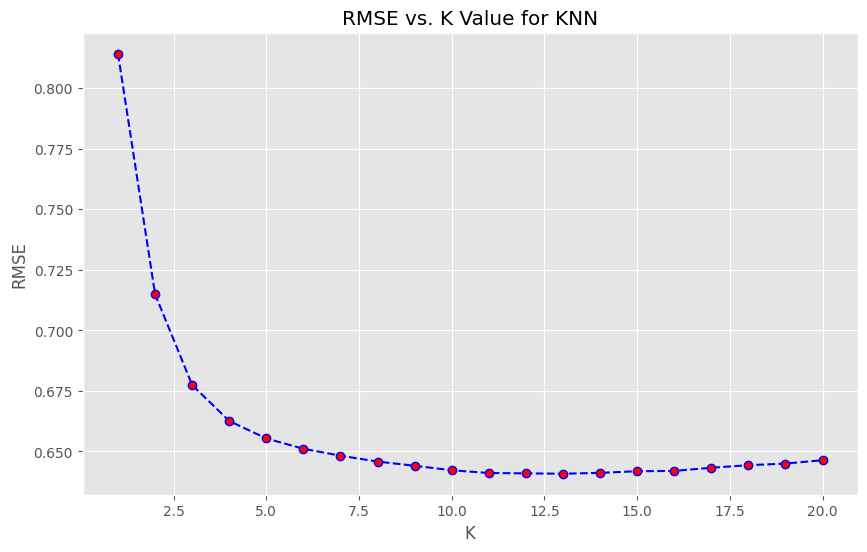

The optimal K is 13 with RMSE: 0.6407969329875416


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset instead of the Boston Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target  # MEDV is the target (house price)

# Split data into features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (KNN is distance-based, so scaling helps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try KNN regression with different values of K
rmse_val = []  # To store RMSE values for each K

for K in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Calculate RMSE for each value of K
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_val.append(rmse)
    print(f"RMSE for K={K}: {rmse}")

# Plot RMSE values against K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('RMSE vs. K Value for KNN')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

# Find the best K (minimum RMSE)
best_k = np.argmin(rmse_val) + 1
print(f"The optimal K is {best_k} with RMSE: {rmse_val[best_k-1]}")

4) Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

RMSE for K=1 (Overfitting case): 0.8142939037875544
RMSE for K=Size of training dataset (Underfitting case): 1.1456636798696462


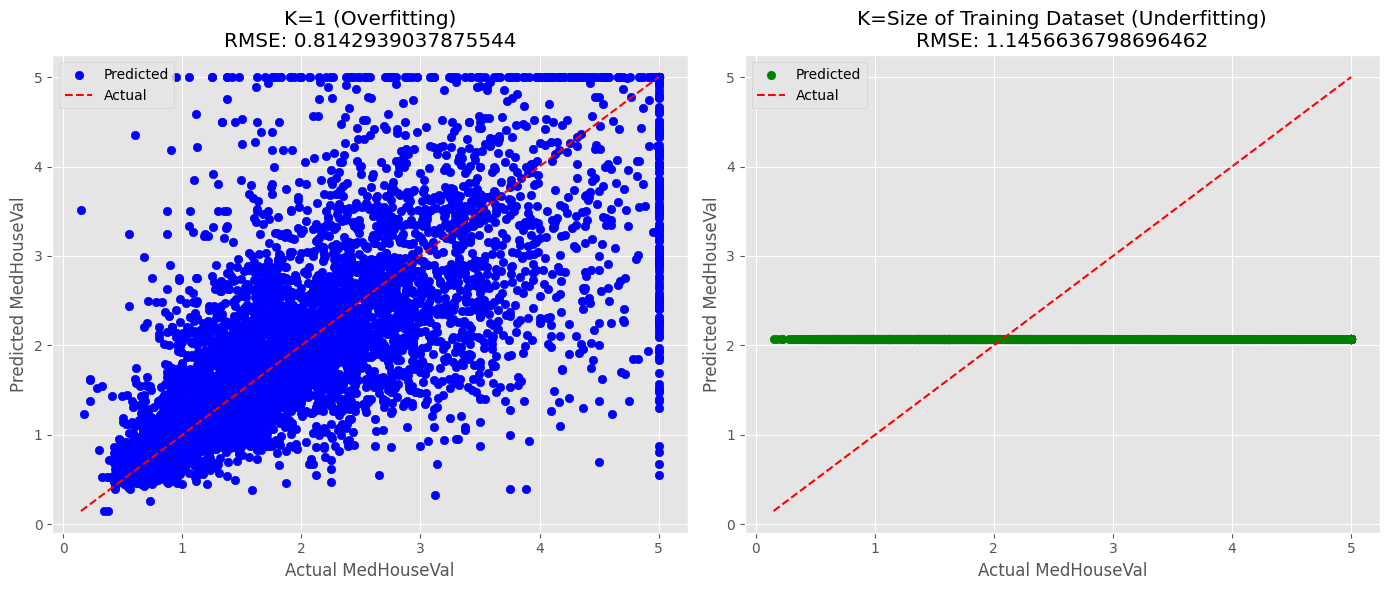

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target  # MedHouseVal is the target (median house value)

# Split data into features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. K = 1 (Overfitting case)
knn_1 = KNeighborsRegressor(n_neighbors=1)
knn_1.fit(X_train_scaled, y_train)
y_pred_1 = knn_1.predict(X_test_scaled)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))
print(f"RMSE for K=1 (Overfitting case): {rmse_1}")

# 2. K = Size of the training dataset (Underfitting case)
K_max = X_train_scaled.shape[0]  # Set K to the size of the training dataset
knn_max = KNeighborsRegressor(n_neighbors=K_max)
knn_max.fit(X_train_scaled, y_train)
y_pred_max = knn_max.predict(X_test_scaled)
rmse_max = np.sqrt(mean_squared_error(y_test, y_pred_max))
print(f"RMSE for K=Size of training dataset (Underfitting case): {rmse_max}")

# Plot predictions against actual values for both cases
plt.figure(figsize=(14, 6))

# Subplot 1: K=1 (Overfitting)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_1, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Actual')
plt.title(f"K=1 (Overfitting)\nRMSE: {rmse_1}")
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.legend()

# Subplot 2: K=Max (Underfitting)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_max, color='green', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Actual')
plt.title(f"K=Size of Training Dataset (Underfitting)\nRMSE: {rmse_max}")
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.legend()

plt.tight_layout()
plt.show()


## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

2. Explore other loss functions and try to understand when and why they are used.

3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood